In [1]:
print("a")

a


num_topics: 3, perplexity: -6.254, coherence: -4.326
num_topics: 4, perplexity: -6.309, coherence: -4.726
num_topics: 5, perplexity: -6.401, coherence: -5.079
num_topics: 6, perplexity: -6.462, coherence: -5.704
num_topics: 7, perplexity: -6.504, coherence: -6.092
num_topics: 8, perplexity: -6.582, coherence: -5.531


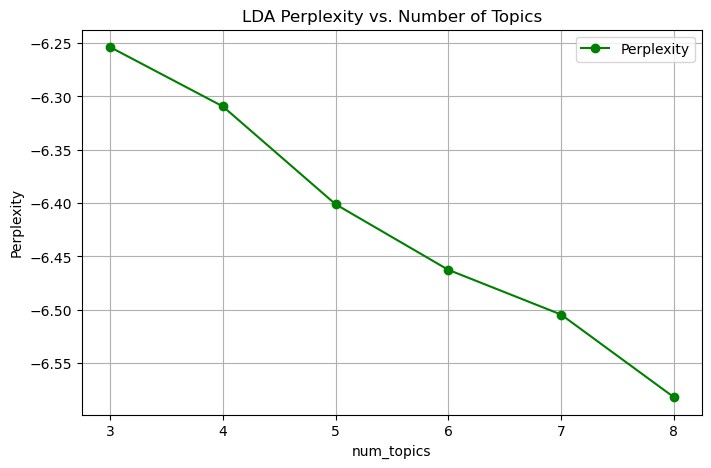

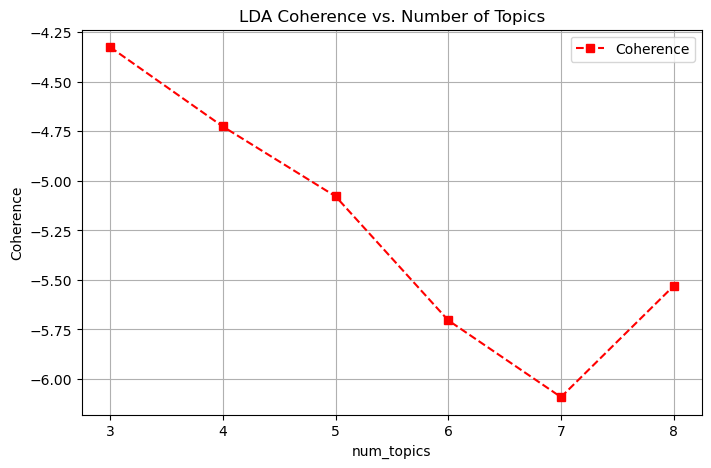

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import LdaModel, CoherenceModel
from gensim.corpora import Dictionary

# 데이터 로드
file_path = "merged_tokens_data.csv"  # 파일 경로를 적절히 변경
data = pd.read_csv(file_path)

# NaN 값 제거 및 문자열 변환
data["Tokens"] = data["Tokens"].dropna().apply(eval)

# Gensim의 Dictionary 및 Corpus 생성
dictionary = Dictionary(data["Tokens"])
corpus = [dictionary.doc2bow(text) for text in data["Tokens"]]

# 혼란도(Perplexity) 및 응집도(Coherence) 비교 함수
def show_coherence(corpus, dictionary, start=3, end=8):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary, chunksize=1000, num_topics=i, random_state=7, passes=5)

        iter_num.append(i)
        
        # 혼란도 계산 (Perplexity)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)
        
        # 응집도 계산 (Coherence)
        cm = CoherenceModel(model=model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)

        print(f'num_topics: {i}, perplexity: {pv:.3f}, coherence: {cv:.3f}')

    # 혼란도(Perplexity) 그래프
    plt.figure(figsize=(8, 5))
    plt.plot(iter_num, per_value, 'g-', marker='o', label="Perplexity")
    plt.xlabel("num_topics")
    plt.ylabel("Perplexity")
    plt.title("LDA Perplexity vs. Number of Topics")
    plt.legend()
    plt.grid()
    plt.show()

    # 응집도(Coherence) 그래프
    plt.figure(figsize=(8, 5))
    plt.plot(iter_num, coh_value, 'r--', marker='s', label="Coherence")
    plt.xlabel("num_topics")
    plt.ylabel("Coherence")
    plt.title("LDA Coherence vs. Number of Topics")
    plt.legend()
    plt.grid()
    plt.show()

# 실행 (토픽 개수 3~8개로 조정)
show_coherence(corpus, dictionary, start=3, end=8)


In [17]:
import pandas as pd
from gensim.models import LdaModel, CoherenceModel
from gensim.corpora import Dictionary

# 데이터 로드
#file_path = "merged_tokens_data.csv"  # 파일 경로를 적절히 변경
#data = pd.read_csv(file_path)

# NaN 값 제거 및 문자열 변환
#data["Tokens"] = data["Tokens"].dropna().apply(eval)

# Gensim의 Dictionary 및 Corpus 생성
dictionary = Dictionary(data["Tokens"])
corpus = [dictionary.doc2bow(text) for text in data["Tokens"]]

# 📌 LDA 모델 학습 (토픽 수 4개)
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, random_state=7, passes=5)

# 📌 각 토픽에서 출력할 단어 개수를 최적화
for num_words in [10, 15,20]:
    cm = CoherenceModel(model=lda_model, texts=data["Tokens"], dictionary=dictionary, coherence='c_v', topn=num_words)
    coherence_score = cm.get_coherence()
    print(f"Top {num_words} words - Coherence Score: {coherence_score:.3f}")


Top 10 words - Coherence Score: 0.495
Top 15 words - Coherence Score: 0.410
Top 20 words - Coherence Score: 0.402


In [6]:
import pandas as pd
from collections import Counter

# 데이터 로드
file_path = 'merged_tokens_data.csv'  # 데이터 파일 경로
data = pd.read_csv(file_path)

# 'Tokens' 컬럼을 리스트로 변환
data['Tokens'] = data['Tokens'].apply(eval)

# 초기 불용어 리스트
stop_words = []

def remove_stopwords(tokens, stop_words):
    """불용어 제거 함수"""
    return [word for word in tokens if word not in stop_words]

while True:
    # 모든 단어의 빈도를 계산
    all_words = [word for tokens in data['Tokens'] for word in tokens]
    word_counts = Counter(all_words)

    # 상위 20개 단어 출력
    #print("\n현재 상위 20개 단어와 빈도:")
    #print(pd.DataFrame(word_counts.most_common(20), columns=['단어', '빈도']))

    # 현재 불용어 목록 출력
    print("\n현재 불용어 목록:", stop_words)

    # 불용어 입력 받기
    user_stopwords = input("추가하고 싶은 불용어를 쉼표로 구분하여 입력하세요 (종료: 엔터): ").strip()
    if user_stopwords == "":
        
        print("프로그램을 종료합니다.")
        break

    # 불용어 업데이트
    stop_words.extend([word.strip() for word in user_stopwords.split(",") if word.strip()])
    stop_words = list(set(stop_words))  # 중복 제거

    # 불용어 제거 적용
    data['Tokens'] = data['Tokens'].apply(lambda tokens: remove_stopwords(tokens, stop_words))



현재 불용어 목록: []
추가하고 싶은 불용어를 쉼표로 구분하여 입력하세요 (종료: 엔터): 떼다

현재 불용어 목록: ['떼다']
추가하고 싶은 불용어를 쉼표로 구분하여 입력하세요 (종료: 엔터): 
프로그램을 종료합니다.


In [ ]:
import pandas as pd
from collections import Counter
from gensim.models import LdaModel, CoherenceModel
from gensim.corpora import Dictionary

# 데이터 로드
file_path = 'merged_tokens_data.csv'  # 데이터 파일 경로
data = pd.read_csv(file_path)

In [13]:

# 'Tokens' 컬럼을 리스트로 변환
data['Tokens'] = data['Tokens'].apply(eval)

# 초기 불용어 리스트
stop_words = []

def remove_stopwords(tokens, stop_words):
    """불용어 제거 함수"""
    return [word for word in tokens if word not in stop_words]

while True:
    # 모든 단어의 빈도를 계산
    all_words = [word for tokens in data['Tokens'] for word in tokens]
    word_counts = Counter(all_words)

    # 현재 불용어 목록 출력
    print("\n현재 불용어 목록:", stop_words)

    # 불용어 입력 받기
    user_stopwords = input("추가하고 싶은 불용어를 쉼표로 구분하여 입력하세요 (종료: 엔터): ").strip()
    if user_stopwords == "":
        print("프로그램을 종료합니다.")
        break

    # 불용어 업데이트
    stop_words.extend([word.strip() for word in user_stopwords.split(",") if word.strip()])
    stop_words = list(set(stop_words))  # 중복 제거

    # 불용어 제거 적용
    data['Tokens'] = data['Tokens'].apply(lambda tokens: remove_stopwords(tokens, stop_words))




현재 불용어 목록: []
추가하고 싶은 불용어를 쉼표로 구분하여 입력하세요 (종료: 엔터): 쓸다,약간,싶다,몰다,나다

현재 불용어 목록: ['약간', '몰다', '쓸다', '나다', '싶다']
추가하고 싶은 불용어를 쉼표로 구분하여 입력하세요 (종료: 엔터): 
프로그램을 종료합니다.


In [15]:
import pandas as pd
from collections import Counter
import pickle

# 데이터 로드
file_path = 'merged_tokens_data.csv'  # 데이터 파일 경로
data = pd.read_csv(file_path)

# 'Tokens' 컬럼을 리스트로 변환
data['Tokens'] = data['Tokens'].apply(eval)

# 불용어 저장 파일
stopwords_file = "stopwords.pkl"

# 기존 불용어 목록 불러오기 (파일이 있으면 로드, 없으면 빈 리스트)
try:
    with open(stopwords_file, "rb") as f:
        stop_words = pickle.load(f)
    print("저장된 불용어 목록을 불러왔습니다:", stop_words)
except FileNotFoundError:
    stop_words = []
    print("불용어 목록 파일이 없어 새로 시작합니다.")

def remove_stopwords(tokens, stop_words):
    """불용어 제거 함수"""
    return [word for word in tokens if word not in stop_words]

while True:
    # 모든 단어의 빈도를 계산
    all_words = [word for tokens in data['Tokens'] for word in tokens]
    word_counts = Counter(all_words)

    # 현재 불용어 목록 출력
    print("\n현재 불용어 목록:", stop_words)

    # 불용어 입력 받기
    user_stopwords = input("추가하고 싶은 불용어를 쉼표로 구분하여 입력하세요 (종료: 엔터): ").strip()
    if user_stopwords == "":
        print("프로그램을 종료합니다.")
        break

    # 불용어 업데이트
    new_stopwords = [word.strip() for word in user_stopwords.split(",") if word.strip()]
    stop_words.extend(new_stopwords)
    stop_words = list(set(stop_words))  # 중복 제거

    # 불용어 제거 적용
    data['Tokens'] = data['Tokens'].apply(lambda tokens: remove_stopwords(tokens, stop_words))

    # 불용어 목록 저장
    with open(stopwords_file, "wb") as f:
        pickle.dump(stop_words, f)

    print("\n업데이트된 불용어 목록이 저장되었습니다.")


불용어 목록 파일이 없어 새로 시작합니다.

현재 불용어 목록: []
추가하고 싶은 불용어를 쉼표로 구분하여 입력하세요 (종료: 엔터): 넘다,입다,많다

업데이트된 불용어 목록이 저장되었습니다.

현재 불용어 목록: ['입다', '넘다', '많다']
추가하고 싶은 불용어를 쉼표로 구분하여 입력하세요 (종료: 엔터): 
프로그램을 종료합니다.


In [14]:

# 📌 불용어가 적용된 데이터로 LDA 모델 학습
dictionary = Dictionary(data["Tokens"])
corpus = [dictionary.doc2bow(text) for text in data["Tokens"]]

# 📌 LDA 모델 학습 (토픽 수 3개)
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, random_state=7, passes=5)

# 📌 토픽 출력
n = 5  # 각 토픽에서 출력할 단어 수
print("\nLDA 토픽 모델링 결과:")
topics = lda_model.print_topics(num_words=n)
for idx, topic in topics:
    print(f"토픽 {idx+1}: {topic}")


LDA 토픽 모델링 결과:
토픽 1: 0.044*"따갑다" + 0.034*"괜찮다" + 0.032*"구매" + 0.029*"만족하다" + 0.027*"감사하다"
토픽 2: 0.343*"좋다" + 0.043*"구매" + 0.030*"편하다" + 0.029*"배송" + 0.027*"촉촉하다"
토픽 3: 0.061*"자극" + 0.058*"피부" + 0.030*"느낌" + 0.026*"촉촉하다" + 0.024*"확실하다"
토픽 4: 0.066*"구매" + 0.063*"피부" + 0.043*"꾸준하다" + 0.038*"좋아지다" + 0.025*"따갑다"


In [16]:

# 📌 불용어가 적용된 데이터로 LDA 모델 학습
dictionary = Dictionary(data["Tokens"])
corpus = [dictionary.doc2bow(text) for text in data["Tokens"]]

# 📌 LDA 모델 학습 (토픽 수 3개)
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, random_state=7, passes=5)

# 📌 토픽 출력
n = 10  # 각 토픽에서 출력할 단어 수
print("\nLDA 토픽 모델링 결과:")
topics = lda_model.print_topics(num_words=n)
for idx, topic in topics:
    print(f"토픽 {idx+1}: {topic}")


LDA 토픽 모델링 결과:
토픽 1: 0.064*"좋다" + 0.034*"편하다" + 0.034*"촉촉하다" + 0.029*"괜찮다" + 0.017*"떼다" + 0.015*"쓸다" + 0.014*"쓰기" + 0.013*"감사하다" + 0.011*"포장" + 0.010*"아프다"
토픽 2: 0.227*"좋다" + 0.088*"구매" + 0.024*"배송" + 0.019*"빠르다" + 0.016*"주문" + 0.015*"만족하다" + 0.014*"품절" + 0.014*"가격" + 0.014*"사보다" + 0.014*"해봤다"
토픽 3: 0.081*"피부" + 0.059*"자극" + 0.033*"따갑다" + 0.032*"느낌" + 0.022*"확실하다" + 0.021*"꾸준하다" + 0.020*"좋아지다" + 0.019*"촉촉하다" + 0.018*"좋다" + 0.014*"얼굴"
